# **One-bin counting experiment**

This exercise aims to reproduce what is done [here](https://cms-analysis.github.io/HiggsAnalysis-CombinedLimit/part5/longexercise#part-1-a-one-bin-counting-experiment) using Pyhf instead of Combine.

The translation of the datacard (```datacard_part1.txt``` -> ```datacard_part1.json```) is performed using [this tool](https://github.com/maxgalli/datacard-to-pyhf).

In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pyhf
from pyhf.contrib.viz import brazil

In [2]:
spec = json.load(open("datacard_part1.json"))

In [3]:
workspace = pyhf.Workspace(spec)

In [4]:
model = workspace.model()

In [5]:
model.config.channels

['signal_region']

In [6]:
print(f"  channels: {model.config.channels}")
print(f"     nbins: {model.config.channel_nbins}")
print(f"   samples: {model.config.samples}")
print(f" modifiers: {model.config.modifiers}")
print(f"parameters: {model.config.parameters}")
print(f"  nauxdata: {model.config.nauxdata}")
print(f"   auxdata: {model.config.auxdata}")

  channels: ['signal_region']
     nbins: {'signal_region': 1}
   samples: ['Ztautau', 'bbHtautau', 'diboson', 'jetFakes', 'ttbar']
 modifiers: [('CMS_eff_b', 'normsys'), ('CMS_eff_t', 'normsys'), ('CMS_eff_t_highpt', 'normsys'), ('acceptance_Ztautau', 'normsys'), ('acceptance_bbH', 'normsys'), ('acceptance_ttbar', 'normsys'), ('norm_jetFakes', 'normsys'), ('r', 'normfactor'), ('xsec_diboson', 'normsys')]
parameters: ['CMS_eff_b', 'CMS_eff_t', 'CMS_eff_t_highpt', 'acceptance_Ztautau', 'acceptance_bbH', 'acceptance_ttbar', 'norm_jetFakes', 'r', 'xsec_diboson']
  nauxdata: 8
   auxdata: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


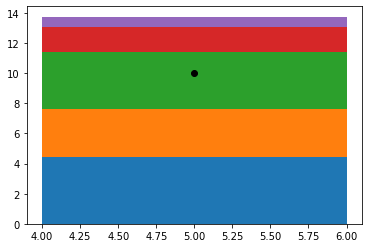

In [7]:
x = 5
lims = (4, 6)

channels = {}
for channel in workspace["channels"]:
    channels[channel["name"]] = channel["samples"]

fig, ax = plt.subplots()

bottom = 0
for channel in model.config.channels:
    ax.plot(x, workspace.observations[channel][0], "ko")
    
    for sample in channels[channel]:
        y = sample["data"][0]
        plt.bar(x, y, lims[1]-lims[0], bottom=bottom)
        bottom += y

In [8]:
observations = [ob[0] for ob in list(workspace.observations.values())] + model.config.auxdata

In [9]:
observations

[10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [10]:
# Simple fit
pyhf.infer.mle.fit(data=observations, pdf=model)

array([ 1.80504151e-05,  1.05027994e-04,  8.85147010e-05, -7.33412171e-07,
        1.55886575e-01,  2.12352186e-05,  3.90928121e-05,  4.41180759e-05,
        4.66577502e-06])

In [12]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    1.0,  # null hypothesis
    observations,
    model,
    test_stat="qtilde",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

      Observed CLs: 0.2911
Expected CLs(-2 σ): 0.0349
Expected CLs(-1 σ): 0.0974
Expected CLs( 0 σ): 0.2468
Expected CLs( 1 σ): 0.5196
Expected CLs( 2 σ): 0.8187


In [9]:
poi_values = np.linspace(0.1, 5, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 1.0745
Upper limit (exp): μ = 1.9857


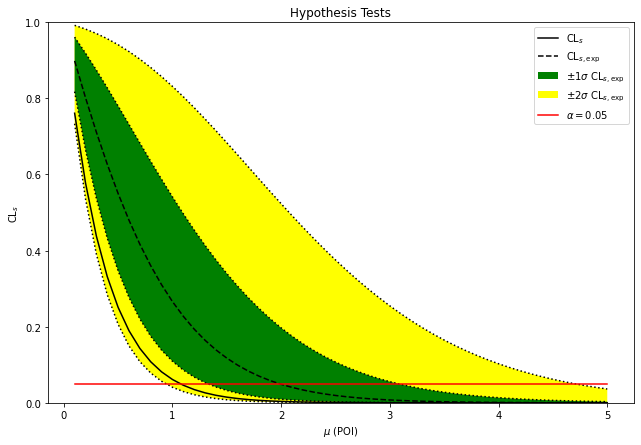

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)